<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Lecture 4: Graph Embeddings

### CS4907/CS6365 Machine Learning

__Sardar Hamidian__<br>The George Washington Universiry

__Armin Mehrabian__<br>The George Washington Universiry

# Introduction to Graph Embeddings


### What are Graph Embeddings?

- **Definition**: Graph embeddings are techniques that map nodes, edges, or entire graphs into low-dimensional vector spaces.
- **Purpose**: Preserve the structural and relational properties of the graph in continuous vector forms.

![Graph Workflow](./img/trad_graphml.png)

# Graph Representation Learning

**Goal:** Efficient task-independent feature learning for machine learning with graphs!

![Graph Workflow](./img/graph_representation.png)


# Why Embedding?

- **Task:** map nodes into an embedding space
  - Similarity of embeddings between nodes indicates their similarity in the network. For example:
    - Both nodes are close to each other (connected by an edge)
  - Encode network information
  - Potentially used for many downstream predictions

**Tasks:**
- Node classification
- Link prediction
- Graph classification
- Anomalous node detection
- Clustering
- …

# Karate Graph Embedding

**Context:**  
This example is from the DeepWalk paper: "DeepWalk: Online Learning of Social Representations" by Perozzi et al.

**Karate Club Network:**  
- A well-known social network representing interactions among members of a karate club.
- Nodes represent individuals; edges represent friendships or interactions.

**Result:**  
- Clusters in the embedding correspond to actual communities within the club.


![Graph Workflow](./img/karate_club_example.png)

**Source:** Perozzi et al., KDD 2014 (https://dl.acm.org/doi/abs/10.1145/2623330.2623732).


# Setup

**Assume we have a graph G:**
- $V$ is the vertex set.
- $A$ is the adjacency matrix (assume binary).
- For simplicity: no node features or extra information is used.

**Graph Representation:**
- **Vertices:** $V = \{1, 2, 3, 4\}$
- **Adjacency Matrix:**

$$
A = 
\begin{bmatrix}
0 & 1 & 0 & 1 \\
1 & 0 & 1 & 1 \\
0 & 1 & 0 & 1 \\
1 & 1 & 1 & 0
\end{bmatrix}
$$

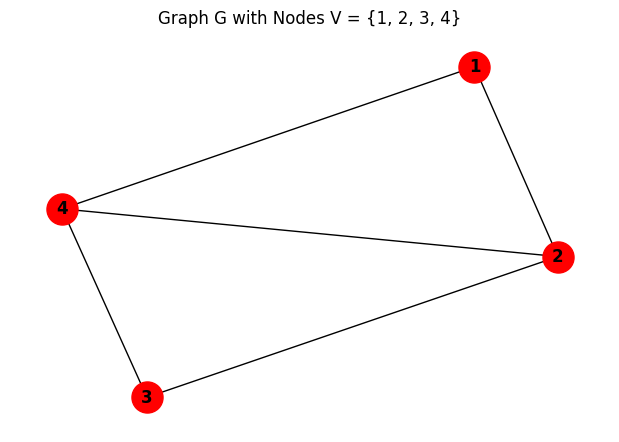

In [1]:
# Python code for graph visualization using networkx and matplotlib
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
A = [
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [1, 1, 1, 0]
]

# Create a graph from the adjacency matrix
G = nx.Graph()
nodes = [1, 2, 3, 4]
G.add_nodes_from(nodes)

# Add edges based on the adjacency matrix
edges = [(1, 2), (1, 4), (2, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw(G, pos, with_labels=True, node_color='red', node_size=500, font_weight='bold', edge_color='black')
plt.title("Graph G with Nodes V = {1, 2, 3, 4}")
plt.show()

# Embedding Nodes

- **Goal:** Encode nodes so that similarity in the embedding space (e.g., dot product) approximates similarity in the graph.


**Original Network:** 
- Nodes $u$ and $v$ are part of the network.

**Embedding Process:**
- Each node is encoded using an encoder function (e.g., $ENC(u)$ and $ENC(v)$).
- In the embedding space, nodes are represented as vectors $z_u$ and $z_v$.
- The embedding aims to preserve the similarity relationships from the original graph, so that similar nodes remain close in the embedding space.

# Learning Node Embeddings

1. **Encoder** maps from nodes to embeddings.
2. **Define a node similarity function** (i.e., a measure of similarity in the original network).
3. **Decoder (DEC)** maps from embeddings to the similarity score.
4. **Optimize the parameters of the encoder** so that:

   $$
   \text{similarity}(u, v) \approx \text{DEC}(z_v^T , z_u)
   $$

   - **In the original network:** $\text{similarity}(u, v)$
   - **Similarity of the embedding:** $z_v^T z_u$

# "Shallow" Encoding

**Simplest encoding approach:** Encoder is just an embedding-lookup.

$$
\text{ENC}(v) = z_v = Z \cdot v
$$

- **$Z \in \mathbb{R}^{d \times |V|}$**:  
  A matrix where each column is a node embedding.  
  **[What we learn/optimize]**

- **$v \in \mathbb{I}^{|V|}$**:  
  An indicator vector, all zeroes except a one in the column indicating node $v$.

# "Shallow" Encoding

**Simplest encoding approach:** Encoder is just an embedding-lookup.

$$
Z =
\begin{bmatrix}
| & | & | & | \\
z_1 & z_2 & \dots & z_{|V|} \\
| & | & | & |
\end{bmatrix}
$$

- **Embedding Matrix ($Z$):**  
  Each column represents the embedding vector for a specific node.

- **Embedding Vector:**  
  A vector that corresponds to the specific node in the graph.

- **Matrix Details:**
  - **One column per node:** Each node in the graph has its own embedding vector represented as a column in $Z$.
  - **Dimension/Size of Embeddings:** The number of rows in $Z$ corresponds to the dimensionality of the embeddings.

# Pros and Cons of Shallow Encoding

**Pros:**
- **Simple and Fast:** Easy to implement with efficient lookups.

**Cons:**
- **Scalability Issues:** Large memory usage for big graphs.
- **No Generalization:** Cannot handle unseen nodes or graph changes.

# Examples of Shallow Embedding

1. **DeepWalk:**
   - Uses random walks on the graph to generate node sequences.
   - Applies the Skip-Gram model (similar to word2vec) to learn node embeddings.

2. **Node2Vec:**
   - Extends DeepWalk by using biased random walks to capture diverse node relationships.
   - Balances exploration and exploitation to better represent structural equivalence.

3. **LINE (Large-scale Information Network Embedding):**
   - Preserves both first-order (direct connections) and second-order (shared neighbors) proximities.
   - Efficient for large-scale networks with billions of nodes and edges.

4. **HOPE (High-Order Proximity preserved Embedding):**
   - Captures high-order proximities (e.g., Katz index) for better representation of long-range dependencies.
   - Suitable for directed graphs with asymmetric relationships.

# Framework Summary

**Encoder + Decoder Framework**

- **Shallow Encoder:** Embedding lookup.
- **Parameters to Optimize:** $Z$, which contains node embeddings $z_u$ for all nodes $u \in V$.
- We will cover deep encoders (GNNs) in future lectures.

**Decoder:**
- Based on node similarity.

**Objective:**
- Maximize $z_v^T z_u$ for node pairs $(u, v)$ that are similar.

# How to Define Node Similarity?

- **Key choice of methods is how they define node similarity.**

- Should two nodes have a similar embedding if they...
  - Are linked?
  - Share neighbors?
  - Have similar "structural roles"?

- We will now learn node similarity definition that uses **random walks**, and how to optimize embeddings for such a similarity measure.

# Note on Node Embeddings

- This is an **unsupervised/self-supervised** way of learning node embeddings.
  - We are **not** utilizing node labels.
  - We are **not** utilizing node features.

- The goal is to directly estimate a set of coordinates (i.e., the embedding) of a node so that some aspect of the network structure is preserved.

- These embeddings are **task independent**:
  - They are not trained for a specific task but can be used for any task.

# Random Walk Approaches to Node Embedding

# Notation

- **Vector $z_u$:**
  - The embedding of node $u$ (what we aim to find).

- **Probability $P(v \mid z_u)$:**
  - The (predicted) probability of visiting node $v$ on random walks starting from node $u$.
  - Our model prediction based on $z_u$.

**Non-linear functions used to produce predicted probabilities:**

- **Softmax function:**
  - Turns a vector of $K$ real values (model predictions) into $K$ probabilities that sum to 1:
  
  $$
  Softmax(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
  $$

- **Sigmoid function:**
  - S-shaped function that turns real values into the range of $(0, 1)$:
  
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$

# Random Walk

- **Definition:** 
  - Given a graph and a starting point, we select a neighbor of it at random and move to this neighbor.
  - Then, from the new point, select another neighbor at random and move to it.
  - This process continues, generating a sequence of nodes.

- **Random Walk on the Graph:**
  - The sequence of points visited in this manner is called a **random walk** on the graph.
  

**Example Steps:**
# Random Walk Steps

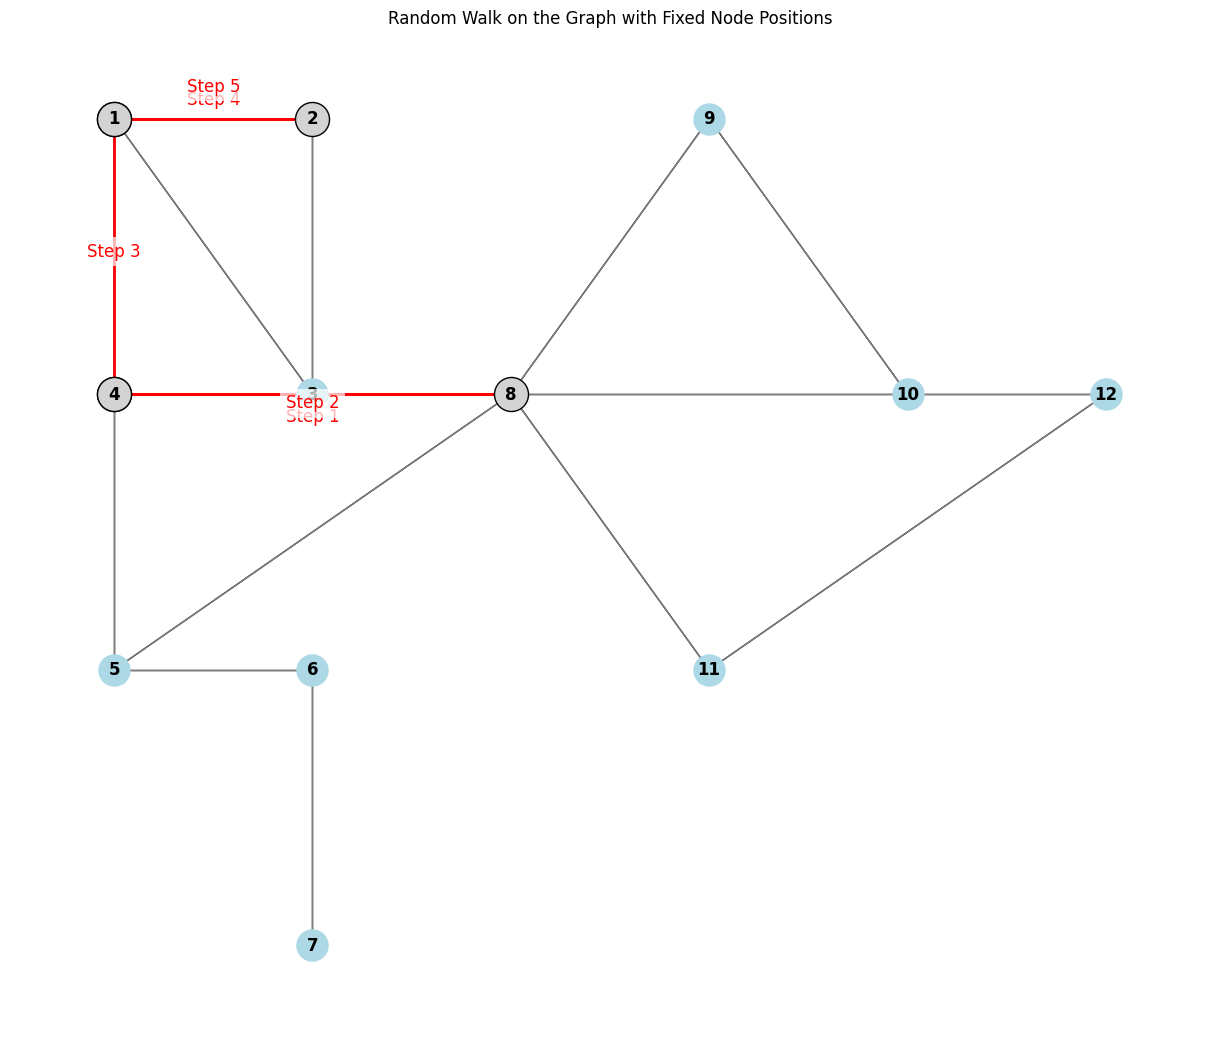

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a graph
G = nx.Graph()

# Add nodes and edges
nodes = range(1, 13)
edges = [
    (1, 2), (1, 3), (1, 4),
    (2, 3), (3, 4), (4, 5),
    (5, 6), (6, 7),
    (4, 8), (5, 8), (8, 9), (8, 10), (8, 11),
    (9, 10), (10, 12), (11, 12)
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define fixed positions for each node to keep the layout consistent
fixed_positions = {
    1: (0, 1), 2: (1, 1), 3: (1, 0), 4: (0, 0),
    5: (0, -1), 6: (1, -1), 7: (1, -2),
    8: (2, 0), 9: (3, 1), 10: (4, 0), 
    11: (3, -1), 12: (5, 0)
}

# Define the random walk function that ensures at least one step back
def random_walk_with_backtracking(graph, start_node, steps):
    walk = [start_node]
    current_node = start_node
    for _ in range(steps - 1):
        neighbors = list(graph.neighbors(current_node))
        if len(neighbors) == 0:
            break  # No more moves possible
        # Ensure at least one backtracking step by occasionally choosing a node from the walk
        if len(walk) > 1 and random.random() < 0.3:  # 30% chance to backtrack
            next_node = random.choice(walk[:-1])  # Choose from previous nodes
        else:
            next_node = random.choice(neighbors)
        walk.append(next_node)
        current_node = next_node
    return walk

# Perform a random walk starting from node 4 for 6 steps with backtracking
walk = random_walk_with_backtracking(G, start_node=4, steps=6)

# Draw the graph with fixed positions
plt.figure(figsize=(12, 10))

# Draw all nodes in light blue except those in the random walk
nx.draw(G, fixed_positions, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
# Highlight the nodes in the random walk with a lighter color
nx.draw_networkx_nodes(G, fixed_positions, nodelist=walk, node_color='lightgrey', node_size=600, edgecolors='black')
# Draw the edges
nx.draw_networkx_edges(G, fixed_positions, edgelist=G.edges, edge_color='gray')
# Highlight the path edges in the random walk
path_edges = list(zip(walk, walk[1:]))
nx.draw_networkx_edges(G, fixed_positions, edgelist=path_edges, edge_color='red', width=2)

# Annotate steps on the edges in the random walk
for i, (u, v) in enumerate(path_edges):
    # Find midpoint of the edge
    x_mid = (fixed_positions[u][0] + fixed_positions[v][0]) / 2
    y_mid = (fixed_positions[u][1] + fixed_positions[v][1]) / 2
    # Offset the label slightly to avoid overlap
    offset = 0.05 * (i - 2)  # Adjust offset dynamically to avoid overlap
    plt.text(x_mid, y_mid + offset, f'Step {i+1}', fontsize=12, ha='center', color='red', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title("Random Walk on the Graph with Fixed Node Positions")
plt.show()

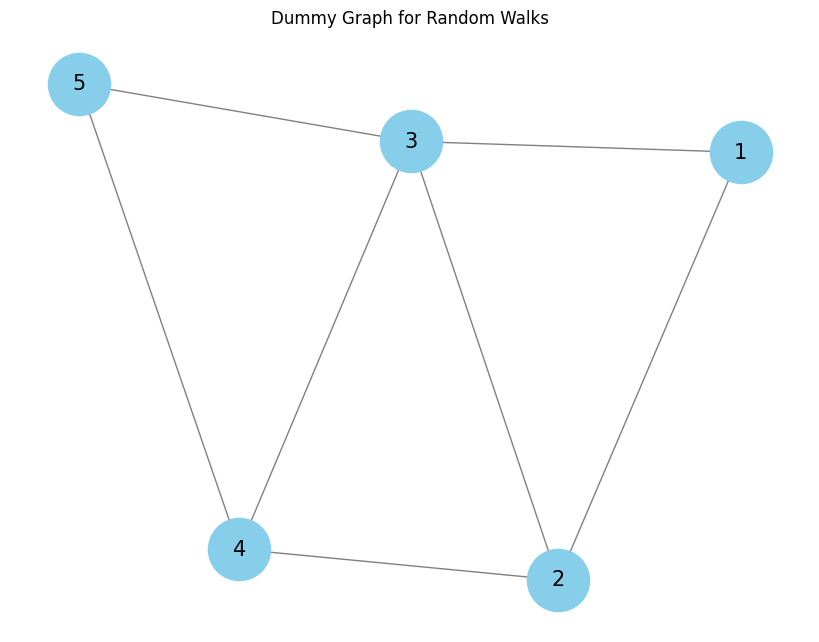

Random Walks starting from node 1:
  Walk 1: [1, 3, 2, 4, 5]
  Walk 2: [1, 3, 1, 3, 5]
  Walk 3: [1, 2, 3, 4, 3]

Random Walks starting from node 2:
  Walk 1: [2, 1, 3, 5, 4]
  Walk 2: [2, 4, 3, 4, 3]
  Walk 3: [2, 1, 2, 4, 2]

Random Walks starting from node 3:
  Walk 1: [3, 1, 2, 3, 5]
  Walk 2: [3, 2, 3, 4, 5]
  Walk 3: [3, 4, 5, 3, 5]

Random Walks starting from node 4:
  Walk 1: [4, 3, 5, 4, 3]
  Walk 2: [4, 5, 4, 2, 4]
  Walk 3: [4, 5, 4, 5, 3]

Random Walks starting from node 5:
  Walk 1: [5, 4, 5, 3, 2]
  Walk 2: [5, 3, 4, 5, 3]
  Walk 3: [5, 4, 5, 4, 2]



In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a small graph
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (3, 5), (2, 4)]
G.add_edges_from(edges)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # for consistent layout
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_color='black', edge_color='gray')
plt.title("Dummy Graph for Random Walks")
plt.show()

# Function to generate random walks
def random_walk(graph, start_node, walk_length):
    walk = [start_node]
    for _ in range(walk_length - 1):
        neighbors = list(graph.neighbors(walk[-1]))
        next_node = random.choice(neighbors)
        walk.append(next_node)
    return walk

# Generate multiple random walks for each node
random_walks_data = {}
num_walks_per_node = 3
walk_length = 5

for start_node in G.nodes():
    random_walks_data[start_node] = [random_walk(G, start_node, walk_length) for _ in range(num_walks_per_node)]

# Print the dataset of random walks
for node, walks in random_walks_data.items():
    print(f"Random Walks starting from node {node}:")
    for i, walk in enumerate(walks, 1):
        print(f"  Walk {i}: {walk}")
    print()  # For better separation


# Random-Walk Embeddings

$$
z_u^T z_v \approx \text{probability that } u \text{ and } v \text{ co-occur on a random walk over the graph}
$$

- The dot product of the embeddings $z_u$ and $z_v$ approximates the probability of nodes $u$ and $v$ appearing together on a random walk within the graph.

# Random-Walk Embeddings

1. **Estimate probability of visiting node $v$ on a random walk starting from node $u$ using some random walk strategy $R$:**
   - $P_R(v \mid u)$: Probability of reaching $v$ from $u$ using the random walk strategy $R$.
   
<img src="./img/random_walk_prob.png" alt="Random_Walk_Prob" width="50%">



2. **Optimize embeddings to encode these random walk statistics:**
   - **Similarity in embedding space** (e.g., dot product = $\cos(\theta)$) encodes random walk "similarity".
   - The angle $\theta$ between embeddings $z_i$ and $z_j$ reflects the similarity based on random walk co-occurrence probabilities.
   
<img src="./img/random_walk_angle.png" alt="Random_walk_angle" width="50%">


# Why Random Walks?

1. **Expressivity:** Flexible stochastic definition of node similarity that incorporates both local and higher-order neighborhood information.

   **Idea:** If random walk starting from node $u$ visits $v$ with high probability, $u$ and $v$ are similar (high-order multi-hop information).



# Example for Expressivity

**Scenario:** Consider a social network graph where nodes represent users, and edges represent friendships. Suppose we want to find users who have similar interests.

**Example:** 

- A random walk starts from user node $u$ and frequently visits node $v$ during the walk.
- This suggests that users $u$ and $v$ are likely to have similar interests.
- The random walk captures both direct and indirect (multi-hop) connections, incorporating both local (immediate friends) and higher-order (friends of friends) neighborhood information.
- Even if $u$ and $v$ are not directly connected, the random walk helps identify their similarity based on their common neighbors or paths in the network.

2. **Efficiency:** Do not need to consider all node pairs when training; only need to consider pairs that co-occur on random walks.

# Example for Efficiency

**Scenario:** In a recommendation system graph, nodes are products, and edges represent co-purchase relationships (products frequently bought together).

**Example:** 

- Instead of comparing every product pair (which is computationally expensive), we only consider pairs that appear together in random walks.
- For instance, a random walk might visit products $A$ and $B$ frequently, indicating a strong co-purchase relationship.
- During training, the model focuses only on these frequently co-occurring pairs.
- This significantly reduces the number of comparisons by ignoring pairs that rarely or never appear together in the random walks, making the training process more efficient.

# Unsupervised Feature Learning


- **Intuition:** Find embedding of nodes in $d$-dimensional space that preserves similarity.



- **Idea:** Learn node embedding such that nearby nodes are close together in the network.


- **Given a node $u$, how do we define nearby nodes?**
  - $N_R(u)$ ... neighbourhood of $u$ obtained by some random walk strategy $R$

# Feature Learning as Optimization


- Given $G = (V, E)$,

- Our goal is to learn a mapping $f: u \rightarrow \mathbb{R}^d: \ f(u) = z_u$

- **Log-likelihood objective:**
  
  $$
  \max_f \sum_{u \in V} \log P(N_R(u) | z_u)
  $$

  $N_R(u)$ is the neighborhood of node $u$ by strategy $R$


- **Given node $u$, we want to learn feature representations that are predictive of the nodes in its random walk neighborhood $N_R(u)$**

# Random Walk Optimization


1. Run **short fixed-length random walks** starting from each node $u$ in the graph using some random walk strategy $R$.


2. For each node $u$, collect $N_R(u)$, the multiset of nodes visited on random walks starting from $u$.


3. Optimize embeddings according to: **Given node $u$, predict its neighbors $N_R(u)$**

   $$
   \max_f \sum_{u \in V} \log P(N_R(u) | z_u) \quad \text{Maximum likelihood objective}
   $$

   *$N_R(u)$ can have repeat elements since nodes can be visited multiple times on random walks.*

# Random Walk Optimization


**Equivalently,**

$$
\mathcal{L} = \sum_{u \in V} \sum_{v \in N_R(u)} -\log(P(v | \mathbf{z}_u))
$$

- **Intuition:** Optimize embeddings $\mathbf{z}_u$ to maximize the likelihood of random walk co-occurrences.


- **Parameterize** $P(v | \mathbf{z}_u)$ **using softmax:**

  $$
  P(v | \mathbf{z}_u) = \frac{\exp(\mathbf{z}_u^\top \mathbf{z}_v)}{\sum_{n \in V} \exp(\mathbf{z}_u^\top \mathbf{z}_n)}
  $$



 **Why softmax?** We want node $v$ to be most similar to node $u$ (out of all nodes $n$).
  
  **Intuition:** $\sum_i \exp(x_i) \approx \max \exp(x_i)$

# Random Walk Optimization

**Putting it all together:**

$$
\mathcal{L} = \sum_{u \in V} \sum_{v \in N_R(u)} -\log \left( \frac{\exp(\mathbf{z}_u^\top \mathbf{z}_v)}{\sum_{n \in V} \exp(\mathbf{z}_u^\top \mathbf{z}_n)} \right)
$$

- Sum over all nodes $u$.
- Sum over nodes $v$ seen on random walks starting from $u$.
- The term inside the log represents the predicted probability of $u$ and $v$ co-occurring on random walks.

**Optimizing random walk embeddings = Finding embeddings $\mathbf{z}_u$ that minimize $\mathcal{L}$**

# Random Walk Optimization

**But doing this naively is too expensive!**

$$
\mathcal{L} = \sum_{u \in V} \sum_{v \in N_R(u)} -\log \left( \frac{\exp(\mathbf{z}_u^\top \mathbf{z}_v)}{\sum_{n \in V} \exp(\mathbf{z}_u^\top \mathbf{z}_n)} \right)
$$

- **Nested sum over nodes gives $\mathcal{O}(|V|^2)$ complexity!**

# Negative Sampling


- **Solution:** Negative sampling

$$
\log \left( \frac{\exp(\mathbf{z}_u^\top \mathbf{z}_v)}{\sum_{n \in V} \exp(\mathbf{z}_u^\top \mathbf{z}_n)} \right) \approx \log \left( \sigma(\mathbf{z}_u^\top \mathbf{z}_v) \right) - \sum_{i=1}^{k} \log \left( \sigma(\mathbf{z}_u^\top \mathbf{z}_{n_i}) \right), \ n_i \sim P_V
$$

- **Sigmoid function** ($\sigma$): Makes each term a "probability" between 0 and 1.



- **Random distribution over nodes**: $n_i \sim P_V$

- Instead of normalizing with respect to all nodes, just normalize against $k$ random "negative samples" $n_i$.

# Negative Sampling

- **Sample $k$ negative nodes each with probability proportional to its degree.**

- **Two considerations for $k$ (# of negative samples):**
  1. Higher $k$ gives more robust estimates.
  2. Higher $k$ corresponds to higher bias on negative events.

- **In practice,** $k = 5$ to $20$

# Intuition: Why Node Degree Matters in Negative Sampling


- **Reflects Node Influence:** Nodes with higher degrees are more central and influential in the graph, making them more likely to appear in random walks.

- **Realistic Sampling:** Sampling based on degree mimics the actual occurrence distribution of nodes, ensuring that influential nodes are proportionally represented.


- **Avoids Bias:** Prevents over-sampling of less connected nodes (low-degree nodes), which are less relevant in random walk paths.


# Gradient Descent

- **After we obtained the objective function, how do we optimize (minimize) it?**

$$
\mathcal{L} = \sum_{u \in V} \sum_{v \in N_R(u)} -\log(P(v | \mathbf{z}_u))
$$

- **Gradient Descent:** A simple way to minimize $\mathcal{L}$:
  
  - **Initialize** $\mathbf{z}_i$ at some randomized value for all $i$.
  
  - **Iterate until convergence:**
    - For all $i$, compute the derivative $\frac{\partial \mathcal{L}}{\partial \mathbf{z}_i}$.
    - For all $i$, make a step towards the direction of the derivative:
    
    $$
    \mathbf{z}_i \leftarrow \mathbf{z}_i - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{z}_i}
    $$
  
    - $\eta$: learning rate

# Stochastic Gradient Descent

- **Stochastic Gradient Descent:** Instead of evaluating gradients over all examples, evaluate it for each individual training example.

- **Steps:**
  - **Initialize** $\mathbf{z}_i$ at some randomized value for all $i$.
  
  - **Iterate until convergence:**

    $$
    \mathcal{L}^{(u)} = \sum_{v \in N_R(u)} -\log(P(v | \mathbf{z}_u))
    $$

    - **Sample a node $i$**, for all $j$, calculate the derivative:

      $$
      \frac{\partial \mathcal{L}^{(i)}}{\partial \mathbf{z}_j}
      $$

    - **For all $j$, update:**

      $$
      \mathbf{z}_j \leftarrow \mathbf{z}_j - \eta \frac{\partial \mathcal{L}^{(i)}}{\partial \mathbf{z}_j}
      $$

    - $\eta$: learning rate

# Random Walks: Summary


1. **Run short fixed-length random walks** starting from each node on the graph.


2. For each node $u$, **collect $N_R(u)$**, the multiset of nodes visited on random walks starting from $u$.


3. **Optimize embeddings using Stochastic Gradient Descent:**

   $$
   \mathcal{L} = \sum_{u \in V} \sum_{v \in N_R(u)} -\log(P(v | \mathbf{z}_u))
   $$

   - We can efficiently approximate this using **negative sampling!**

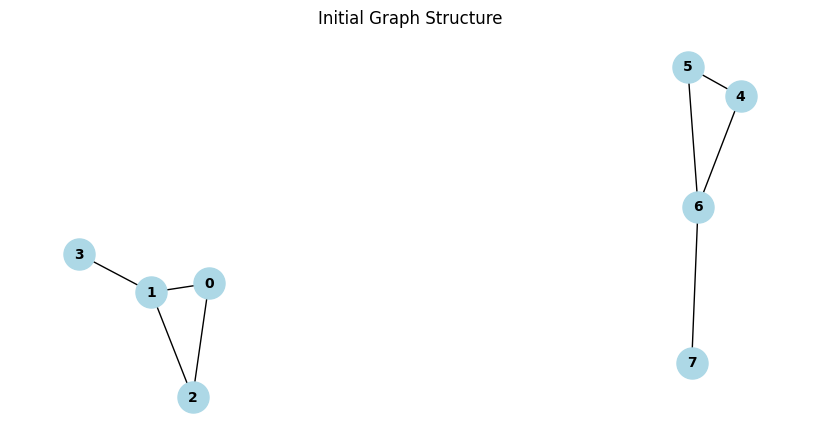

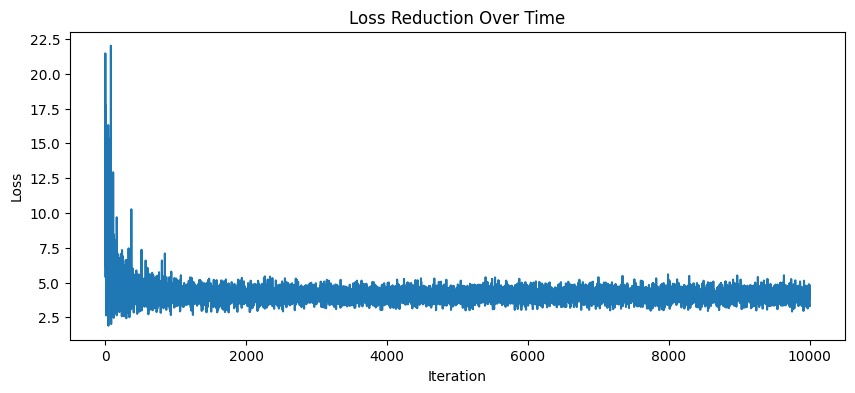

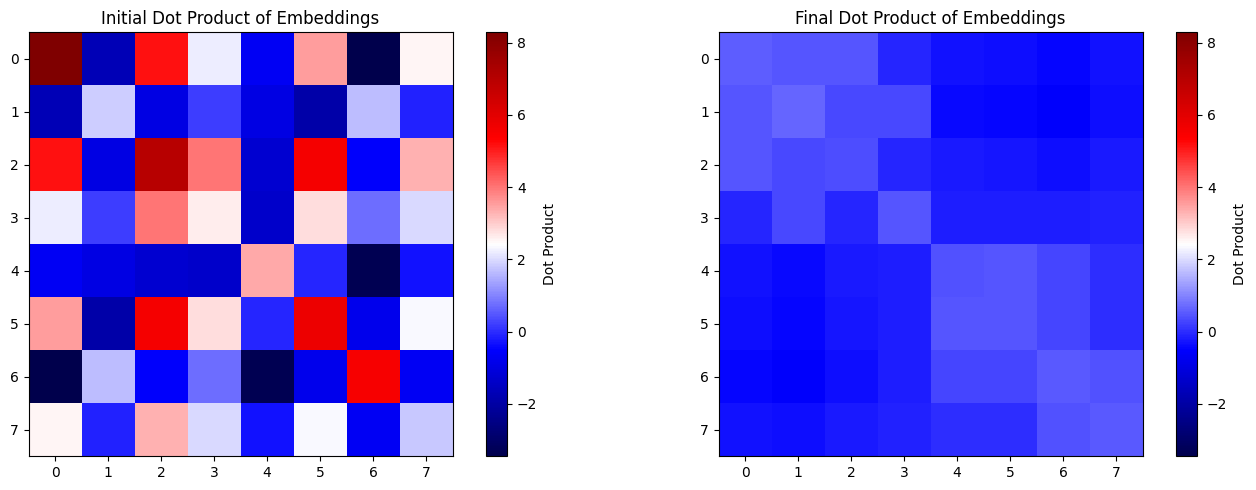

In [25]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

# Parameters
embedding_dim = 4
learning_rate = 0.01
num_steps = 10000  # Number of iterations for SGD

# Create a graph with two isolated subgraphs, each with varied internal connectivity
# Section 1
edges1 = [(0, 1), (0, 2), (1, 2), (1, 3)]  # Node 1 is central, closer to others
# Section 2 with one less connection to node 7 to create distinct internal structure
edges2 = [(4, 5), (4, 6), (5, 6), (6, 7)]  # Node 5 is more central, node 7 less connected

# Combine all edges to create two isolated subgraphs
edges = edges1 + edges2

# Create the graph using NetworkX
G = nx.Graph()
G.add_edges_from(edges)

# Initialize node embeddings using PyTorch
num_nodes = G.number_of_nodes()
embeddings = torch.nn.Embedding(num_nodes, embedding_dim)
torch.nn.init.normal_(embeddings.weight, mean=0, std=1)

# Optimizer
optimizer = optim.SGD(embeddings.parameters(), lr=learning_rate)

# Function to perform a random walk starting from a given node
def random_walk(G, start_node, walk_length=2):
    walk = [start_node]
    current_node = start_node
    for _ in range(walk_length):
        neighbors = list(G.neighbors(current_node))
        if len(neighbors) == 0:
            break
        next_node = random.choice(neighbors)
        walk.append(next_node)
        current_node = next_node
    return walk

# Function to compute the dot product between two vectors
def dot_product(vec1, vec2):
    return torch.dot(vec1, vec2).item()

# Function to calculate the loss using negative sampling
def calculate_loss(u, v, negative_samples, embeddings):
    pos_score = torch.dot(embeddings.weight[u], embeddings.weight[v])
    pos_loss = -torch.log(torch.sigmoid(pos_score))

    neg_loss = 0
    for neg in negative_samples:
        neg_score = torch.dot(embeddings.weight[u], embeddings.weight[neg])
        neg_loss += -torch.log(torch.sigmoid(-neg_score))
    
    return pos_loss + neg_loss

# Visualize the initial graph and embeddings' dot products
def visualize_initial_graph(G, embeddings):
    # Plot the initial graph
    plt.figure(figsize=(8, 4))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    plt.title("Initial Graph Structure")
    plt.show()

    # Calculate initial dot products
    dot_products_initial = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            dot_products_initial[i, j] = dot_product(embeddings.weight[i], embeddings.weight[j])

    return dot_products_initial, list(range(num_nodes))

# SGD step with visualization of loss and dot products
def sgd_step(G, embeddings, learning_rate=0.01, num_steps=100):
    nodes = torch.arange(num_nodes)
    loss_history = []

    for step in range(num_steps):
        optimizer.zero_grad()
        
        # Step 1: Sample a random node
        u = random.choice(nodes).item()

        # Step 2: Perform a random walk from the sampled node
        walk = random_walk(G, u)
        if len(walk) < 2:
            continue
        v = walk[1]  # The first step in the walk

        # Negative sampling (sample nodes that are not in the walk)
        negative_samples = random.choices(nodes.tolist(), k=5)

        # Step 3: Calculate the loss
        loss = calculate_loss(u, v, negative_samples, embeddings)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.item())

    # Calculate final dot products
    dot_products_final = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            dot_products_final[i, j] = dot_product(embeddings.weight[i], embeddings.weight[j])

    # Plot loss over time
    plt.figure(figsize=(10, 4))
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Reduction Over Time')
    plt.show()

    return dot_products_final

# Visualize the initial graph and embeddings
dot_products_initial, nodes = visualize_initial_graph(G, embeddings)

# Run the SGD with visualization
dot_products_final = sgd_step(G, embeddings, learning_rate=learning_rate, num_steps=num_steps)

# Set color range limits for comparison
vmin, vmax = min(dot_products_initial.min(), dot_products_final.min()), max(dot_products_initial.max(), dot_products_final.max())

# Plot initial and final dot products side by side using a diverging colormap
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(dot_products_initial, cmap='seismic', interpolation='none', vmin=vmin, vmax=vmax)
plt.colorbar(label='Dot Product')
plt.xticks(ticks=np.arange(len(nodes)), labels=nodes)
plt.yticks(ticks=np.arange(len(nodes)), labels=nodes)
plt.title("Initial Dot Product of Embeddings")

plt.subplot(1, 2, 2)
plt.imshow(dot_products_final, cmap='seismic', interpolation='none', vmin=vmin, vmax=vmax)
plt.colorbar(label='Dot Product')
plt.xticks(ticks=np.arange(len(nodes)), labels=nodes)
plt.yticks(ticks=np.arange(len(nodes)), labels=nodes)
plt.title("Final Dot Product of Embeddings")

plt.tight_layout()
plt.show()

# How Should We Randomly Walk?

- So far we have described how to optimize embeddings given a random walk strategy $R$.
  
- **What strategies should we use to run these random walks?**
  - **Simplest idea**: Just run fixed-length, unbiased random walks starting from each node (i.e., [DeepWalk from Perozzi et al., 2013](https://dl.acm.org/doi/10.1145/2623330.2623732)).
    - The issue is that such a notion of similarity is too constrained.


# How can we generalize this?


### node2vec

# Overview of node2vec

- **Goal**: Embed nodes with similar network neighborhoods close in the feature space.

- We frame this goal as a maximum likelihood optimization problem, independent of the downstream prediction task.

- **Key observation**: Flexible notion of network neighborhood $N_R(u)$ of node $u$ leads to rich node embeddings.

- Develop biased 2nd order random walk $R$ to generate network neighborhood $N_R(u)$ of node $u$.

---

**Reference**: Grover et al. 2016. [node2vec: Scalable Feature Learning for Networks](https://dl.acm.org/doi/10.1145/2939672.2939754). *KDD*.


# node2vec: Biased Walks

**Idea**: Use flexible, biased random walks that can trade off between **local** and **global** views of the network ([Grover and Leskovec, 2016](https://dl.acm.org/doi/10.1145/2939672.2939754)).

- **Local View (BFS)**: Focuses on exploring nodes that are nearby, emphasizing the local neighborhood structure.
- **Global View (DFS)**: Focuses on exploring nodes that are further away, capturing broader, more global network structures.


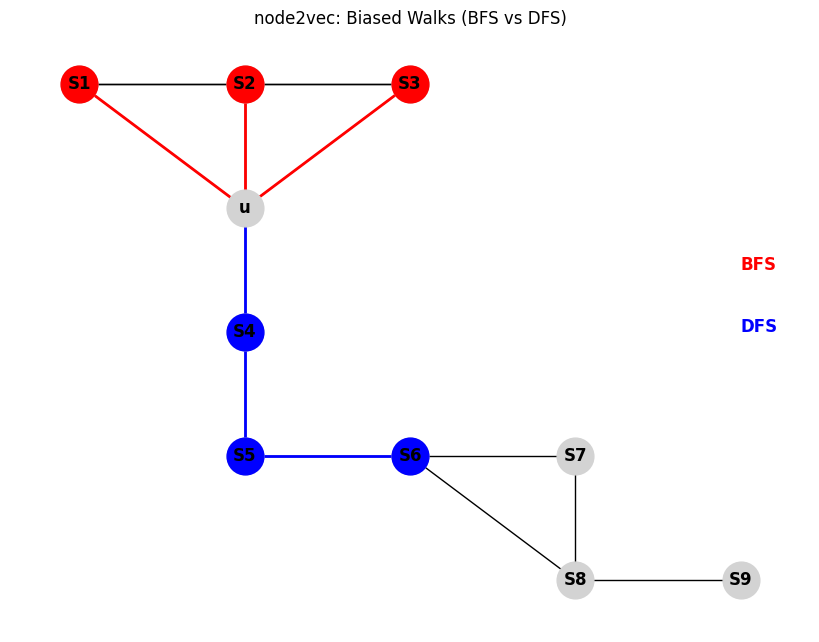

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph with specific structure similar to the slide
G = nx.Graph()
edges = [
    ('u', 'S1'), ('u', 'S2'), ('u', 'S3'), ('u', 'S4'),
    ('S1', 'S2'), ('S2', 'S3'), ('S3', 'S1'),
    ('S4', 'S5'), ('S5', 'S6'), ('S6', 'S7'), ('S7', 'S8'), ('S8', 'S9'), ('S6', 'S8')
]

G.add_edges_from(edges)

# Define node positions manually to match the visual layout
pos = {
    'u': (0, 0), 'S1': (-1, 1), 'S2': (0, 1), 'S3': (1, 1),
    'S4': (0, -1), 'S5': (0, -2), 'S6': (1, -2), 'S7': (2, -2),
    'S8': (2, -3), 'S9': (3, -3)
}

# Draw the entire graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightgray', font_size=12, font_weight='bold', edge_color='black')

# Highlight BFS neighborhood in red (nodes S1, S2, S3)
bfs_edges = [('u', 'S1'), ('u', 'S2'), ('u', 'S3')]
nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='red', width=2)
nx.draw_networkx_nodes(G, pos, nodelist=['S1', 'S2', 'S3'], node_color='red', node_size=700)

# Highlight DFS neighborhood in blue (nodes S4, S5, S6)
dfs_edges = [('u', 'S4'), ('S4', 'S5'), ('S5', 'S6')]
nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='blue', width=2)
nx.draw_networkx_nodes(G, pos, nodelist=['S4', 'S5', 'S6'], node_color='blue', node_size=700)

# Add legend
plt.text(3, -0.5, 'BFS', color='red', fontsize=12, fontweight='bold')
plt.text(3, -1, 'DFS', color='blue', fontsize=12, fontweight='bold')

plt.title("node2vec: Biased Walks (BFS vs DFS)")
plt.axis('off')
plt.show()


# node2vec: Biased Walks

**Two classic strategies to define a neighborhood $N_R(u)$ of a given node $u$:**

- **Walk of length 3 ($N_R(u)$ of size 3):**
  
  - **$N_{BFS}(u) = \{ S_1, S_2, S_3 \}$**: Local microscopic view (Breadth-First Search).
  - **$N_{DFS}(u) = \{ S_4, S_5, S_6 \}$**: Global macroscopic view (Depth-First Search).


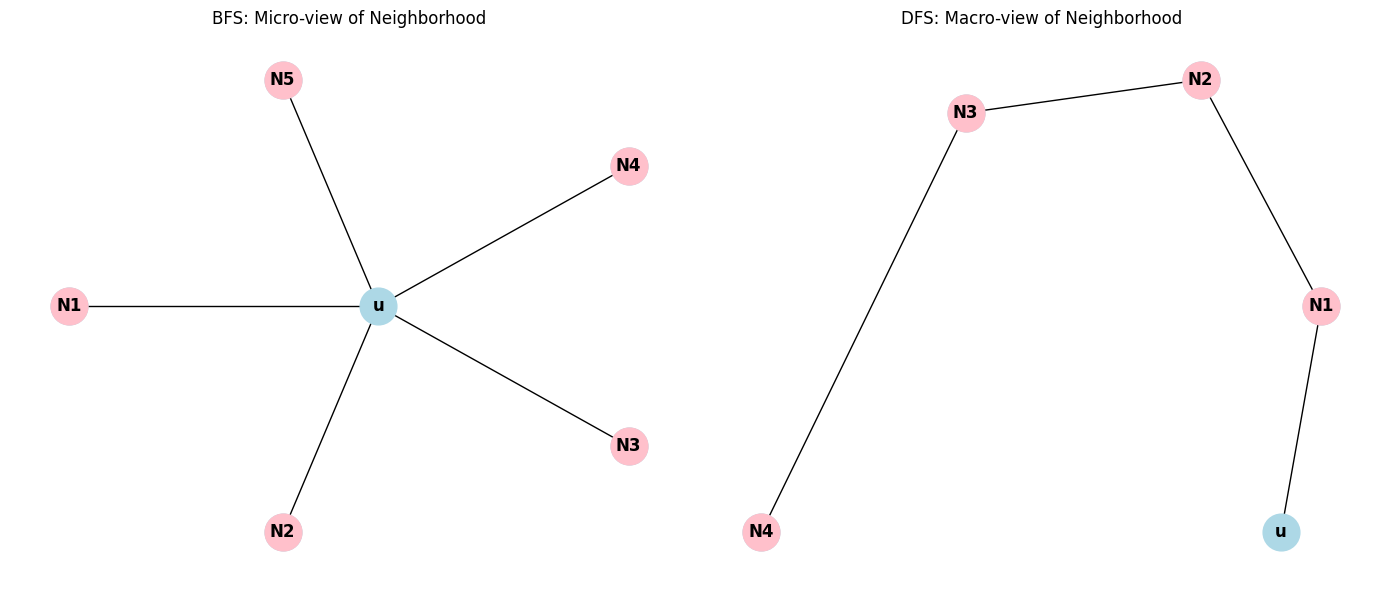

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Create two graphs: one for BFS and one for DFS
G_bfs = nx.Graph()
G_dfs = nx.Graph()

# BFS Graph (micro-view: close neighbors)
bfs_edges = [('u', 'N1'), ('u', 'N2'), ('u', 'N3'), ('u', 'N4'), ('u', 'N5')]
G_bfs.add_edges_from(bfs_edges)

# DFS Graph (macro-view: exploring further nodes)
dfs_edges = [('u', 'N1'), ('N1', 'N2'), ('N2', 'N3'), ('N3', 'N4')]
G_dfs.add_edges_from(dfs_edges)

# Define positions for both graphs to mimic BFS and DFS views
pos_bfs = nx.shell_layout(G_bfs, nlist=[['u'], ['N1', 'N2', 'N3', 'N4', 'N5']])
pos_dfs = nx.shell_layout(G_dfs, nlist=[['u'], ['N1'], ['N2'], ['N3'], ['N4']])

# Visualization
plt.figure(figsize=(14, 6))

# BFS Plot
plt.subplot(1, 2, 1)
nx.draw(G_bfs, pos_bfs, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold')
nx.draw_networkx_nodes(G_bfs, pos_bfs, nodelist=['N1', 'N2', 'N3', 'N4', 'N5'], node_color='pink', node_size=700)
plt.title("BFS: Micro-view of Neighborhood")

# DFS Plot
plt.subplot(1, 2, 2)
nx.draw(G_dfs, pos_dfs, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold')
nx.draw_networkx_nodes(G_dfs, pos_dfs, nodelist=['N1', 'N2', 'N3', 'N4'], node_color='pink', node_size=700)
plt.title("DFS: Macro-view of Neighborhood")

plt.tight_layout()
plt.show()


# Interpolating BFS and DFS

**Biased fixed-length random walk $R$ that, given a node $u$, generates neighborhood $N_R(u)$**

- **Two parameters:**
  - **Return parameter $p$:**
    - Controls returning back to the previous node.
  - **In-out parameter $q$:**
    - Controls the balance between moving outwards (DFS) vs. inwards (BFS).
    - Intuitively, $q$ is the "ratio" of BFS vs. DFS.


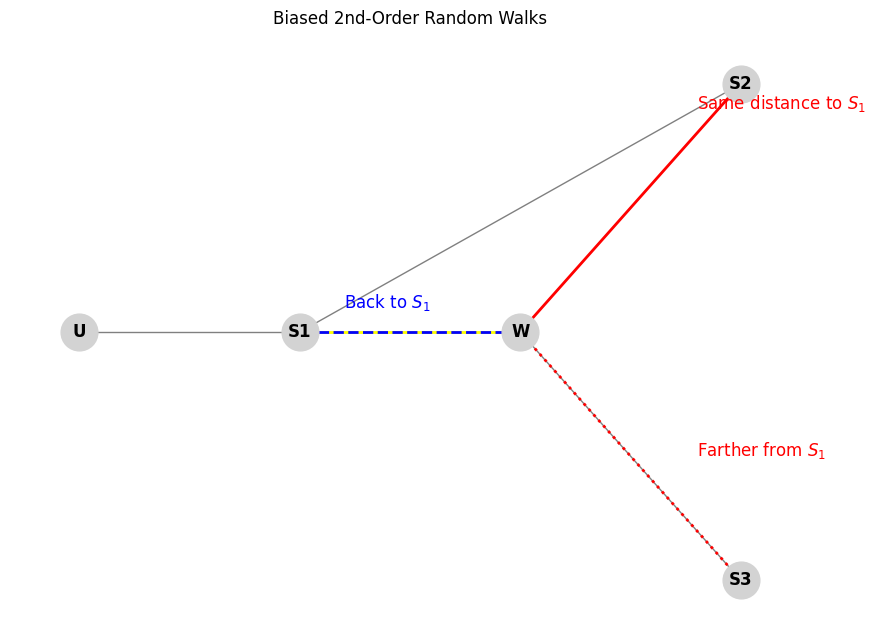

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph that illustrates the biased 2nd-order random walk
G = nx.Graph()
edges = [
    ('U', 'S1'), ('S1', 'W'), ('W', 'S2'), ('W', 'S3'), ('S1', 'S2')
]

G.add_edges_from(edges)

# Define positions for the graph
pos = {
    'U': (-1, 0), 'S1': (0, 0), 'W': (1, 0), 'S2': (2, 1), 'S3': (2, -1)
}

# Draw the full graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightgray', font_size=12, font_weight='bold', edge_color='gray')

# Highlight specific edges based on the biased random walk steps
nx.draw_networkx_edges(G, pos, edgelist=[('S1', 'W')], edge_color='yellow', width=2)  # Previous step
nx.draw_networkx_edges(G, pos, edgelist=[('W', 'S1')], edge_color='blue', width=2, style='dashed')  # Return step
nx.draw_networkx_edges(G, pos, edgelist=[('W', 'S2')], edge_color='red', width=2)  # Same distance
nx.draw_networkx_edges(G, pos, edgelist=[('W', 'S3')], edge_color='red', width=2, style='dotted')  # Farther away

# Add annotations to distinguish the walks
plt.text(0.2, 0.1, 'Back to $S_1$', color='blue', fontsize=12)
plt.text(1.8, 0.9, 'Same distance to $S_1$', color='red', fontsize=12)
plt.text(1.8, -0.5, 'Farther from $S_1$', color='red', fontsize=12)

plt.title("Biased 2nd-Order Random Walks")
plt.axis('off')
plt.show()


# Biased Random Walks

**Biased 2nd-order random walks explore network neighborhoods:**

- **Scenario**: Random walk just traversed edge $(S_1, w)$ and is now at $w$.
- **Insight**: Neighbors of $w$ can only be:
  - **$S_2$**: Same distance to $S_1$ (neutral step).
  - **$S_3$**: Farther from $S_1$ (exploration step).
  - **$S_1$**: Returning back to the previous node (return step).

**Idea**: Remember where the walk came from to inform the next step.


# Biased Random Walks

- **Walker came over edge $(S_1, w)$ and is at $w$. Where to go next?**

  - **Transition probabilities** are determined by parameters $p$ and $q$:
    - **$p$**: Return parameter, influencing the likelihood of returning to the previous node $S_1$.
    - **$q$**: "Walk away" parameter, influencing the likelihood of moving to nodes farther from the current path.

  - The probabilities of moving to each neighbor of $w$ are unnormalized as follows:
    - **$S_1$**: Probability $\frac{1}{p}$ (return step).
    - **$S_2$**: Probability $1$ (same distance step).
    - **$S_3, S_4$**: Probability $\frac{1}{q}$ (exploration steps).

**Note**: The values $\frac{1}{p}$, $\frac{1}{q}$, and $1$ represent unnormalized probabilities that control the direction of the next step.


# node2vec Algorithm

1. **Compute random walk probabilities**
   - Calculate the transition probabilities for each node based on parameters $p$ and $q$.

2. **Simulate $r$ random walks of length $l$ starting from each node $u$**
   - Generate multiple biased random walks for each node to capture its context in the graph.

3. **Optimize the node2vec objective using Stochastic Gradient Descent**
   - Use the generated walks to learn node embeddings by optimizing the node2vec objective function.

---

- **Linear-time complexity**: The algorithm runs efficiently in linear time with respect to the number of nodes and edges.
- **Parallelizable**: All three steps are individually parallelizable, allowing for scalable and efficient execution.


# Different Kinds of Biased Random Walks

- **Based on node attributes**:
  - Use node-specific features, such as node types, roles, or other metadata, to guide the walk.
  - Example: Dong et al., 2017.
  - **How it works**: The walk prioritizes nodes that share similar attributes or have significant attributes, effectively clustering nodes with similar characteristics.

- **Based on learned weights**:
  - Adjust transition probabilities dynamically based on weights learned during training.
  - Example: Abu-El-Haija et al., 2017.
  - **How it works**: The model learns weights that reflect the importance of edges or nodes, allowing the walk to focus on more relevant paths, enhancing the representation of node importance or influence within the graph.


# Alternative Optimization Schemes

- **Optimize based on 1-hop and 2-hop random walk probabilities**:
  - Focuses on optimizing node embeddings using immediate neighbors (1-hop) and second-order neighbors (2-hop).
  - Example: LINE from Tang et al., 2015.
  - **How it works**: Directly optimizes embeddings by capturing the relationships of each node with its nearest neighbors and slightly extended neighbors without performing long random walks.
  - **1-hop (first-order proximity)**: Represents the direct connection between nodes, emphasizing strong, immediate relationships (e.g., friendships in a social network).
  - **2-hop (second-order proximity)**: Captures indirect connections, highlighting nodes that share common neighbors, thereby reflecting a broader sense of community or similar functional roles.


# Network Preprocessing Techniques

- **Run random walks on modified versions of the original network**:
  - Modify the graph's structure before performing random walks to emphasize different patterns or features.
  - Examples:
    - **Struct2vec**: Focuses on capturing nodes with similar structural roles (Ribeiro et al., 2017).
    - **HARP**: Hierarchical representation learning that simplifies complex graphs into multi-level hierarchies (Chen et al., 2016).
  - **How it works**: By altering the graph (e.g., compressing similar nodes or emphasizing certain pathways), these techniques allow the random walks to better reflect desired graph properties, such as hierarchical relationships or structural equivalence.


# Summary


- **Core Idea**: Embed nodes so that distances in the embedding space reflect node similarities in the original network.


- **Different Notions of Node Similarity**:
  - **Naïve**: Nodes are considered similar if they are directly connected.
  - **Neighborhood Overlap**: Similarity is based on the extent of overlap in the neighbors of two nodes (covered in Lecture 3).
  - **Random Walk Approaches**: Uses random walks to capture node similarities based on shared paths and network structures (covered today).


# So what method should we use..?
 


 - No single method is superior in all scenarios.
  - **Example**: node2vec performs better on node classification tasks, whereas alternative methods may excel in link prediction tasks (Goyal and Ferrara, 2017 survey).
  

- **Random Walk Approaches**:
  - Generally more efficient due to their ability to capture both local and global structures with a flexible sampling strategy.


- **In General**:
  - It's crucial to select the definition of node similarity that aligns best with your specific application.

# Embedding Entire Graphs and/or Sub-Graphs

# Embedding Entire Graphs

- **Goal**: Embed a subgraph or an entire graph $( G )$. This process is referred to as **Graph Embedding** denoted by $( \mathbf{z}_G )$.

![Embedding Entire Graphs](./img/entire_graph_embedding.png)



# Use Cases of Entire Graph Embedding




### 1. Molecular Graph Analysis
- **Objective**: Classify molecular structures as toxic or non-toxic based on their entire structure.
- **Application**: Entire molecular graphs are embedded into a continuous vector space, capturing the complete structural properties. This vector is then used in predictive models to classify the toxicity or biological activity of the molecule.
- **Resource**: [Deep Learning Models for Toxicity Prediction](https://pubs.acs.org/doi/abs/10.1021/acs.jcim.0c01294)



### 2. Graph-Based Document Classification
- **Objective**: Classify documents by embedding entire graphs that represent the structure of the document.
- **Application**: Represent documents as graphs where nodes could be sentences, and edges could represent semantic or logical connections. The entire graph is embedded into a vector space, which is then used for classification tasks, such as determining the topic or genre of the document.
- **Resource**: [Graph Embeddings for Document Classification](https://arxiv.org/abs/1909.08402)




# Approach 1

### Simple Idea 1:
- **Run a standard graph embedding technique on the (sub)graph $G$.**
- **Then sum (or average) the node embeddings in the (sub)graph $G$.**

$$
z_G = \sum_{v \in G} z_v
$$

- **Used by** [Duvenaud et al., 2016](https://arxiv.org/abs/1509.09292) **to classify molecules based on their graph structure.**


# Approach 2

### Idea 2:
- **Introduce a "virtual node"** to represent the (sub)graph and run a standard graph embedding technique.

- **Proposed by** [Li et al., 2016](https://arxiv.org/abs/1611.03578) **as a general technique for subgraph embedding**.

![Embedding Virtual Node](./img/virtual_nodes_embedding.png)


# Approach 3: Anonymous Walk Embeddings

- **States in anonymous walks** correspond to the index of the **first time** we visited the node in a random walk.


[Anonymous Walk Embeddings, ICML 2018](https://arxiv.org/pdf/1805.11921.pdf)


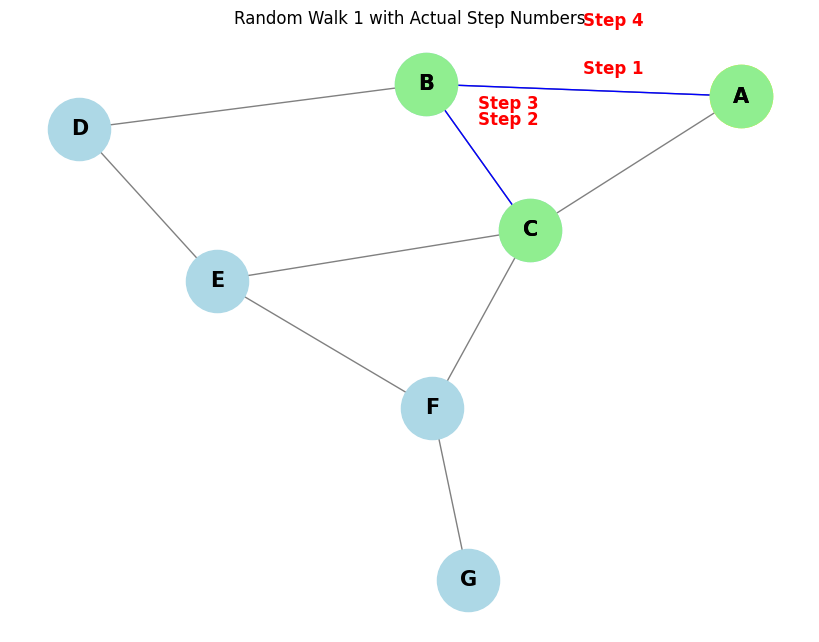

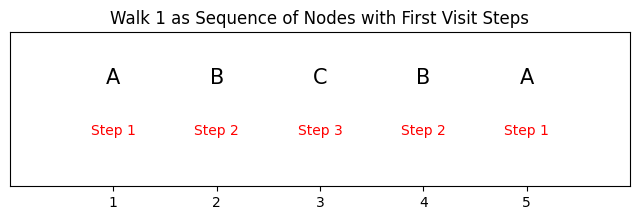

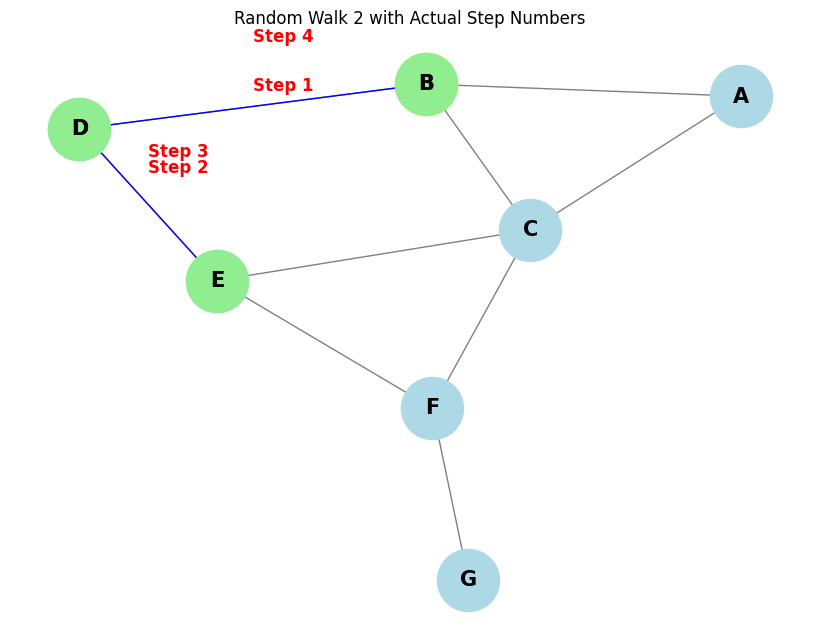

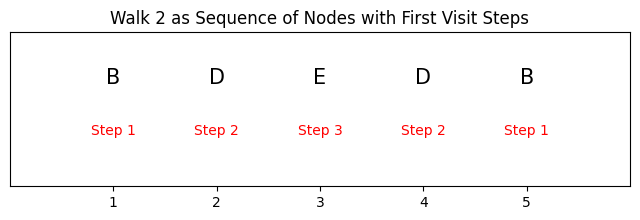

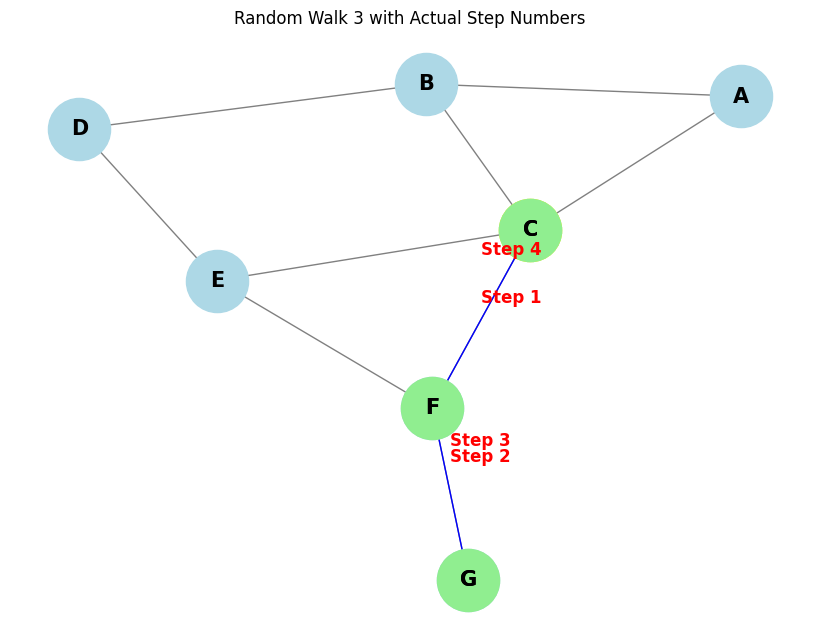

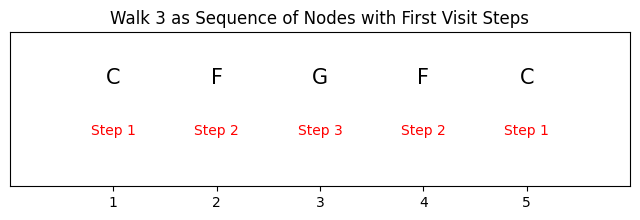

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the main graph
G = nx.Graph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('C', 'F')]
G.add_edges_from(edges)

# Define positions for the nodes to maintain consistent layout
pos = nx.spring_layout(G, seed=42)

# Define the random walks (including returning to previous nodes)
random_walks = [
    [('A', 'B'), ('B', 'C'), ('C', 'B'), ('B', 'A')],  # Walk 1: Returning to A through B
    [('B', 'D'), ('D', 'E'), ('E', 'D'), ('D', 'B')],  # Walk 2: Returning to B through D
    [('C', 'F'), ('F', 'G'), ('G', 'F'), ('F', 'C')]   # Walk 3: Returning to C through F
]

# Walk sequences
walk_sequences = [
    ['A', 'B', 'C', 'B', 'A'],  # Walk 1
    ['B', 'D', 'E', 'D', 'B'],  # Walk 2
    ['C', 'F', 'G', 'F', 'C']   # Walk 3
]

# Visualize each random walk and walk sequences
for i, (walk_edges, walk) in enumerate(zip(random_walks, walk_sequences), start=1):
    # Visualize the graph and highlight the walk
    subG = nx.Graph()
    subG.add_edges_from(walk_edges)
    
    plt.figure(figsize=(8, 6))
    # Draw full graph for context
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')
    
    # Highlight the starting node in a different color
    start_node = walk_edges[0][0]
    nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='yellow', node_size=2000)

    # Highlight random walk
    nx.draw(subG, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=15, font_weight='bold', edge_color='blue')
    
    # Annotate each step in the walk (like before, based on the actual step in the sequence)
    for step, edge in enumerate(walk_edges, start=1):
        mid_point = (pos[edge[0]] + pos[edge[1]]) / 2  # Midpoint of the edge
        offset = 0.05 * step  # Small offset to avoid overlap
        plt.text(mid_point[0], mid_point[1] + offset, f"Step {step}", fontsize=12, color='red', fontweight='bold')
    
    plt.title(f"Random Walk {i} with Actual Step Numbers")
    plt.show()

    # Visualize the walk sequence as numbers with first visit steps
    plt.figure(figsize=(8, 2))
    
    # Plot the walk as a sequence of node labels with first visit steps
    first_visit_step = {}
    for step, node in enumerate(walk, start=1):
        if node not in first_visit_step:
            first_visit_step[node] = step
        plt.text(step, 1, node, fontsize=15, ha='center', color='black')  # Display the node
        plt.text(step, 0.5, f"Step {first_visit_step[node]}", fontsize=10, ha='center', color='red')  # Display the first visit step
    
    # Customize the plot
    plt.xlim(0, len(walk) + 1)
    plt.ylim(0, 1.5)
    plt.xticks(range(1, len(walk) + 1))
    plt.yticks([])  # Remove y-axis ticks
    plt.title(f"Walk {i} as Sequence of Nodes with First Visit Steps")
    plt.show()


# Anonymous Walk Embeddings

## Random Walks in Graphs


### Traditional Random Walks
- In traditional random walks, a sequence of nodes is traversed in a graph.
- The walk is defined by the specific nodes visited, with each step typically dependent on the current node.


### Anonymous Random Walks
- **Key Idea:** Instead of tracking specific nodes, anonymous random walks capture the structural patterns.
- Focus on the **roles or types** of nodes visited (e.g., node degrees), ignoring specific identities.
- This approach allows the embedding to be invariant to node permutations, making it robust and generalizable.


### Benefits
- **Structural Focus:** Captures both local and global graph structures.
- **Node Invariance:** Embeddings are robust to changes in node identities.
- **Generalization:** Effective across various graph types without relying on specific node features.


# Growth of Anonymous Walks

## Exponential Growth of Walks

- **Observation:** The number of anonymous walks grows exponentially with the length of the walk.
- As the length of the walk increases, the possible number of anonymous walks rises dramatically.


## Example:
- For a walk of length 3, there are 5 distinct anonymous walks:
  - $w_1 = 111$
  - $w_2 = 112$
  - $w_3 = 121$
  - $w_4 = 122$
  - $w_5 = 123$

![Anonymous Walks Example](./img/anon_walk_embedding.png)


![Growth of Anonymous Walks](./img/anon_walks_vs_length.png)
- The bar chart shows the exponential growth of anonymous walks with increasing walk lengths, demonstrating how quickly the complexity escalates as the walk length increases.

# Simple Use of Anonymous Walks

## Steps for Utilizing Anonymous Walks

- **Simulate anonymous walks** $w_i$ of $l$ steps and record their counts.
- **Representation:** The graph is represented as a probability distribution over these walks.

## Example:
- Set $l = 3$.
- The graph can be represented as a 5-dimensional vector because there are 5 anonymous walks $w_i$ of length 3: 111, 112, 121, 122, 123.
- $Z_G[i] = $ probability of anonymous walk $w_i$ in graph $G$.


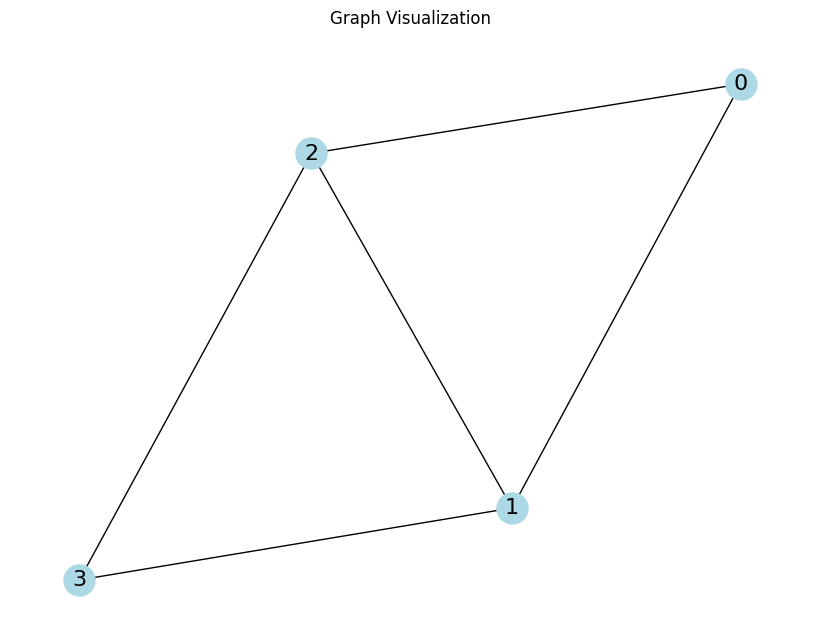

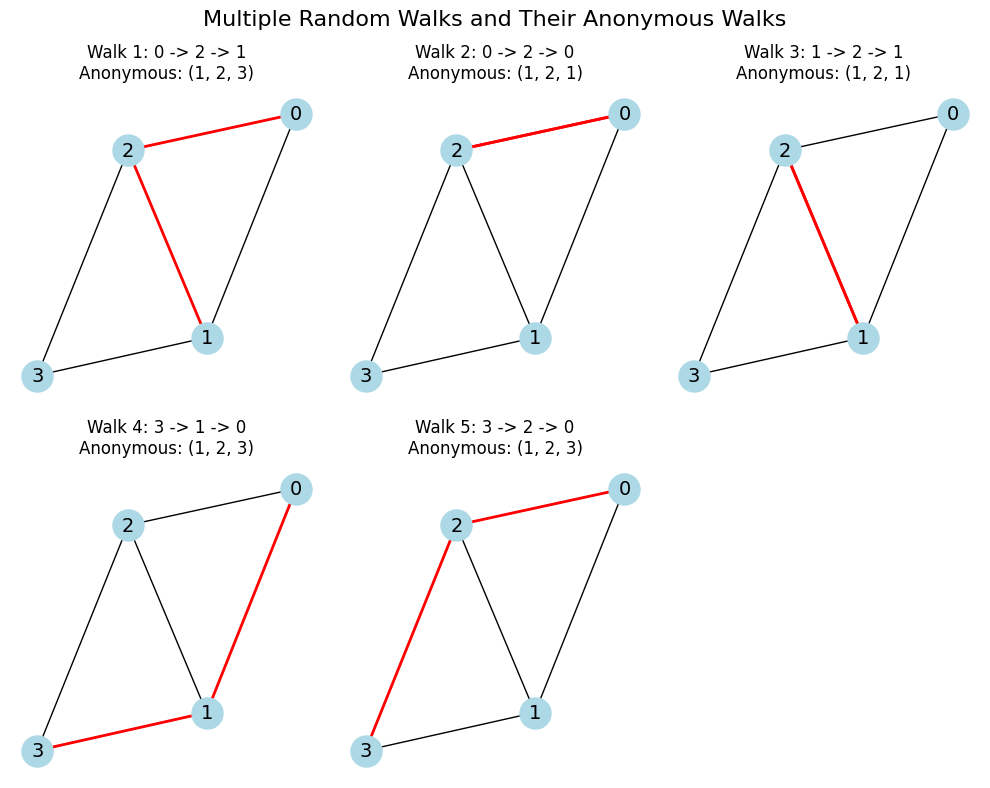


Graph Embedding: [0.      0.      0.39075 0.      0.60925]
Probability of (1, 1, 1): 0.0
Probability of (1, 1, 2): 0.0
Probability of (1, 2, 1): 0.39075
Probability of (1, 2, 2): 0.0
Probability of (1, 2, 3): 0.60925


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Define the graph
graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2]
}

# Create a NetworkX graph for visualization
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]
G.add_edges_from(edges)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # for consistent layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16)
plt.title("Graph Visualization")
plt.show()

# Function to perform a random walk of length l
def random_walk(graph, start_node, length):
    walk = [start_node]
    for _ in range(length - 1):
        next_node = np.random.choice(graph[walk[-1]])
        walk.append(next_node)
    return walk

# Function to convert walk to anonymous walk
def to_anonymous_walk(walk):
    node_mapping = {}
    current_label = 1
    anonymous_walk = []
    for node in walk:
        if node not in node_mapping:
            node_mapping[node] = current_label
            current_label += 1
        anonymous_walk.append(node_mapping[node])
    return tuple(anonymous_walk)

# Function to convert walk to string format for better printing
def walk_to_str(walk):
    return " -> ".join(str(int(node)) for node in walk)

# Simulate walks and count frequencies
walk_length = 3
num_walks = 1000
walk_counts = defaultdict(int)

for node in graph:
    for _ in range(num_walks):
        walk = random_walk(graph, node, walk_length)
        anon_walk = to_anonymous_walk(walk)
        walk_counts[anon_walk] += 1

# Normalize counts to get probabilities
total_walks = sum(walk_counts.values())
walk_probs = {walk: count / total_walks for walk, count in walk_counts.items()}

# Visualize multiple random walks
num_walks_to_display = 5
plt.figure(figsize=(10, 8))

for i in range(num_walks_to_display):
    start_node = np.random.choice(list(graph.keys()))
    example_walk = random_walk(graph, start_node, walk_length)
    anon_walk = to_anonymous_walk(example_walk)
    walk_edges = [(example_walk[j], example_walk[j+1]) for j in range(len(example_walk) - 1)]

    plt.subplot(2, 3, i+1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=14)
    nx.draw_networkx_edges(G, pos, edgelist=walk_edges, edge_color='red', width=2)
    plt.title(f"Walk {i+1}: {walk_to_str(example_walk)}\nAnonymous: {anon_walk}")

plt.suptitle("Multiple Random Walks and Their Anonymous Walks", fontsize=16)
plt.tight_layout()
plt.show()

# Create the embedding (5-dimensional vector)
embedding = np.zeros(5)
anonymous_walks = [(1, 1, 1), (1, 1, 2), (1, 2, 1), (1, 2, 2), (1, 2, 3)]

for i, aw in enumerate(anonymous_walks):
    embedding[i] = walk_probs.get(aw, 0)

# Print out the embedding to verify it has 5 elements
print("\nGraph Embedding:", embedding)
for i, aw in enumerate(anonymous_walks):
    print(f"Probability of {aw}: {embedding[i]}")


# Sampling Anonymous Walks

## Overview:
- **Sampling Anonymous Walks:** Generate a set of $m$ random walks independently.
- **Representation:** The graph is represented as a probability distribution over these walks.


## How Many Random Walks $m$ Do We Need?
- The goal is to ensure that the distribution error is within $\epsilon$ with a probability of less than $\delta$.
- The required number of walks $m$ is given by:
  $$ 
  m = \left\lceil \frac{2}{\epsilon^2} \left(\log(2^\eta - 2) - \log(\delta)\right) \right\rceil
  $$
  where $\eta$ is the total number of anonymous walks of length $l$.

## Example:
- For $\eta = 877$ (number of anonymous walks of length $l = 7$), $\epsilon = 0.1$, and $\delta = 0.01$:
  - You would need to generate $m = 122,500$ random walks.


# New Idea: Learn Walk Embeddings


## Concept:
- **Learn Walk Embeddings:** Instead of representing each walk by its occurrence frequency, we learn an embedding $z_i$ for each anonymous walk $w_i$.
- **Graph Embedding:** Simultaneously learn a graph embedding $Z_G$ along with all anonymous walk embeddings $z_i$.
- The complete set of embeddings is denoted as $Z = \{z_i : i = 1, \ldots, \eta\}$, where $\eta$ is the number of sampled anonymous walks.




## How to Embed Walks?
- **Idea:** Embed walks such that the next walk can be predicted.

# Learn Walk Embeddings

## Overview:
- **Vector Parameter $Z_G$:** Represents the input graph and is learned as part of the embedding process. This parameter captures the entire graph's embedding.


  
## Process:
- **Starting from Node 1:** Sample anonymous random walks, e.g., $w_1$, $w_2$, $w_3$, $w_4$.
  
## Objective:
- **Predict Co-Occurring Walks:** Learn to predict walks that co-occur within a $\Delta$-size window (e.g., predict $w_2$ given $w_1$, $w_3$ if $\Delta = 1$).
- **Maximize the Objective Function:**
  $$
  \max \sum_{t=\Delta}^{T-\Delta} \log P(w_t | w_{t-\Delta}, \ldots, w_{t+\Delta}, Z_G)
  $$
- **Sum:** Apply the objective function across all starting nodes in the graph.


# Example: Learning Walk Embeddings

## Embedding Size:
- **Walk Embeddings:** Each walk is represented as a vector, derived from the embeddings of the nodes within that walk.
- If node embeddings have size 3, the walk embedding is also a vector of size 3, computed from the node embeddings.

## Understanding $\Delta$:
- **Context Window ($\Delta$):** 
  - Defines how many surrounding walks are used in the context to predict the current walk.
  - For $\Delta = 1$, the context for predicting $w_t$ includes $w_{t-1}$ and $w_{t+1}$.

## Objective:
- Maximize the probability of predicting the correct walk given its context within the $\Delta$ window.


# Question:

**Why attempt to predict future walks from previous walks if the walks are random?**



# Explanation:

- **Structural Patterns:** Even though the walks are generated randomly, they reflect the underlying structure of the graph. Predicting future walks from previous ones helps the model capture these structural patterns.


- **Learning Graph Features:** The prediction task forces the model to learn meaningful representations of the graph, encoding relationships and similarities between nodes or substructures within the graph.



- **Objective:** By embedding and predicting walks, we capture complex graph properties in the embedding space.


# Objective Function for an Example Set of Walks

### Given Walks:
- Walk 1: $w_1 = [0, 1, 2]$
- Walk 2: $w_2 = [1, 2, 3]$
- Walk 3: $w_3 = [2, 3, 0]$
- Walk 4: $w_4 = [3, 0, 1]$

### Objective Function:
For $\Delta = 1$, the objective function is:

$$
\max \sum_{t=2}^{3} \log P(w_t | w_{t-1}, w_{t+1}, Z_G)
$$

This expands to:

$$
\log P(w_2 | w_1, w_3, Z_G) + \log P(w_3 | w_2, w_4, Z_G)
$$

### Explanation:
- **$P(w_2 | w_1, w_3, Z_G)$:** Probability of $w_2$ given $w_1$ and $w_3$.
- **$P(w_3 | w_2, w_4, Z_G)$:** Probability of $w_3$ given $w_2$ and $w_4$.


# Appendix

# Learn Walk Embeddings

## Process:
- **Run $T$ different random walks** from node $u$, each of length $l$:
  $$
  N_R(u) = \{w_1^u, w_2^u, \ldots, w_T^u\}
  $$
  
- **Predict Co-occurring Walks:** Learn to predict walks that co-occur within a $\Delta$-size window.
- **Estimate Embeddings:** Estimate the embedding $z_i$ of an anonymous walk $w_i$. Let $\eta$ be the total number of possible walk embeddings.

## Objective:
- The objective function to maximize is:
  $$
  \max_{Z, d} \frac{1}{T} \sum_{t=\Delta}^{T-\Delta} \log P(w_t | \{w_{t-\Delta}, \ldots, w_{t+\Delta}, Z_G\})
  $$
  
- **Probability Computation:**
  $$
  P(w_t | \{w_{t-\Delta}, \ldots, w_{t+\Delta}, Z_G\}) = \frac{\exp(y(w_t))}{\sum_{i=1}^{\eta} \exp(y(w_i))}
  $$
  
- **Linear Layer:**
  $$
  y(w_t) = b + U \cdot \text{cat}\left(\frac{1}{2\Delta}\sum_{i=-\Delta}^{\Delta} z_i, Z_G\right)
  $$
  
  where $b \in \mathbb{R}$ and $U \in \mathbb{R}^d$ are learnable parameters, and "cat" denotes concatenation.


# Example Calculation of the Objective Function

### Example Set of Walks:
- Walk 1: $w_1 = [0, 1, 2]$
- Walk 2: $w_2 = [1, 2, 3]$
- Walk 3: $w_3 = [2, 3, 0]$
- Walk 4: $w_4 = [3, 0, 1]$

### Steps to Calculate:

1. **Linear Layer $y(w_t)$ Calculation:**
   $$
   y(w_t) = b + U \cdot \text{cat}\left(\frac{1}{2\Delta}\sum_{i=-\Delta}^{\Delta} z_i, Z_G\right)
   $$
   Calculate for each walk $w_t$.

2. **Probability $P(w_t | \text{context})$:**
   $$
   P(w_t | \text{context}) = \frac{\exp(y(w_t))}{\sum_{i=1}^{\eta} \exp(y(w_i))}
   $$
   Compute for each walk given its context.

3. **Sum Log Probabilities:**
   $$
   \sum_{t=\Delta}^{T-\Delta} \log P(w_t | \text{context})
   $$

4. **Maximize Objective:**
   $$
   \max_{Z, d} \frac{1}{T} \sum_{t=\Delta}^{T-\Delta} \log P(w_t | \text{context})
   $$
   The goal is to maximize this averaged sum over all walks.


# Learn Walk Embeddings

## Graph Embedding $Z_G$:
- **Optimization:** We obtain the graph embedding $Z_G$ (a learnable parameter) after optimization.
- **Usage:** The embedding $Z_G$ can be used to make predictions, such as graph classification.

## Prediction Options:
- **Option 1:** Use an inner product kernel $Z_{G_1}^T Z_{G_2}$ (as discussed in Lecture 2).
- **Option 2:** Use a neural network that takes $Z_G$ as input to classify graphs.

## Architecture:
- The overall architecture involves updating $Z_G$ based on anonymous walk predictions and using it for downstream tasks.
  
![Learn Walk Embeddings](./img/learn_anon_walk.png)


# How to Use Embeddings

## Node Embeddings $z_i$:

- **Clustering/Community Detection:** Cluster points $z_i$ to identify communities.
- **Node Classification:** Predict the label of node $i$ based on its embedding $z_i$.
- **Link Prediction:** Predict the existence of an edge $(i, j)$ using the embeddings $(z_i, z_j)$.

## Combining Embeddings:
- **Concatenate:** $f(z_i, z_j) = g([z_i, z_j])$
- **Hadamard:** $f(z_i, z_j) = g(z_i \ast z_j)$
- **Sum/Avg:** $f(z_i, z_j) = g(z_i + z_j)$
- **Distance:** $f(z_i, z_j) = g(||z_i - z_j||_2)$

## Graph Classification:
- Use the graph embedding $Z_G$, aggregated from node embeddings or anonymous walks, to classify the entire graph.
